In [1]:
# 判別分析について
# 入力データの特徴量を用いてクラスラベルを定めるため方法
# 2値分類等の判別問題で活用する

w = [[-0.0212934 ]
 [-0.02436149]] 



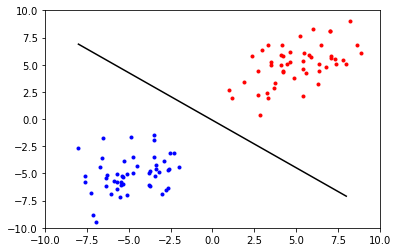

In [2]:
# フィッシャーの判別分析について
# λ(w)=群間分散/郡内分散が最大となるwを求める

import numpy as np
import matplotlib.pyplot as plt

# データの次元数
DIM = 2 

# 共分散
cov = [[3,1],[1,3]]

# クラス1とクラス2のデータを生成
cls1 = np.random.multivariate_normal([-5,-5], cov, 50)
cls2 = np.random.multivariate_normal([5,5], cov, 50)

# 線形変換ベクトルwを求める
cls1 = np.array(cls1)
cls2 = np.array(cls2)

# 各クラスの平均を算出
mean1 = np.mean(cls1, axis=0)
mean2 = np.mean(cls2, axis=0)

# クラス内共分散行列
sw = np.zeros((DIM,DIM))
for xn in cls1:
    xn = xn.reshape(DIM,1)
    mean1 = mean1.reshape(DIM,1)
    sw += np.dot((xn-mean1),(xn-mean1).T)
for xn in cls2:
    xn = xn.reshape(DIM,1)
    mean2 = mean2.reshape(DIM,1)
    sw += np.dot((xn-mean2),(xn-mean2).T)

# クラス内共分散行列の逆行列
sw_inv = np.linalg.inv(sw)

# wを求める
w = np.dot(sw_inv,(mean1-mean2))
print('w =', w, '\n')

# 決定境界を図示する
mean = (mean1 + mean2)/2 # 平均値の中点
a = -w[0]/w[1] # wと直交する方向
b = a*mean[0]+mean[1]
x = np.linspace(-8, 8, 1000)
y = a*x+b
line = (x, y)

x_1,y_1 = cls1.T
plt.plot(x_1, y_1, 'bo', ms=3, label='class1')
x_2, y_2 = cls2.T
plt.plot(x_2, y_2, 'ro', ms=3, label='class2')
if not (line is None):
    plt.plot(line[0], line[1], 'k-', ms=5)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

# 新たなデータの判別はクラス1、クラス2のマハラノビス距離の比較で行う(2次判別分析)

In [3]:
# 正準判別分析について
# クラスの数が2以上のデータについて、次元圧縮を用いて判別を行う
# フィッシャーの判別分析と同様に群間分散/郡内分散が最大となるwを求める

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


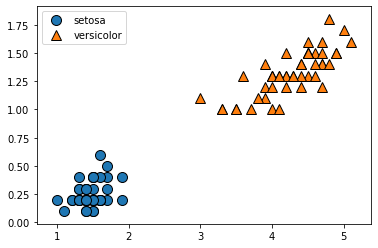

In [4]:
# SVM(サポートベクターマシン)について
# 機械学習における代表的な2クラス判別手法
# 判別平面と最も近いデータ点の距離(マージン)が最大になるように判別平面を定める

# irisデータで実践
from sklearn.datasets import load_iris
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
import mglearn

iris = load_iris()

# 判別対象変数 setosa:0, versicolor:1, virginica:2
print(iris.target)

# 目的変数と説明変数に分離
X = iris.data[:100, 2:]
Y = iris.target[:100]

# setosaとversicolorのデータを描画
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()



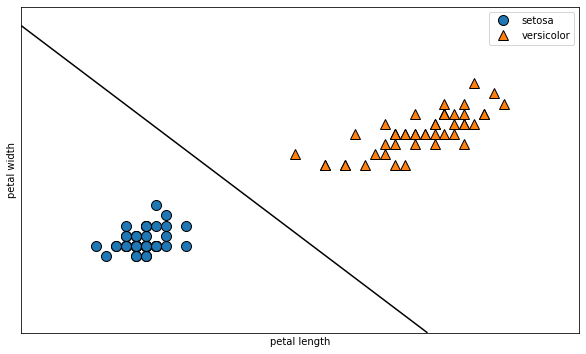

In [5]:
# モデルを作成
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC()
svm.fit(X_train, Y_train)

# 判別関数を描画
plt.figure(figsize=(10, 6))
mglearn.plots.plot_2d_separator(svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()

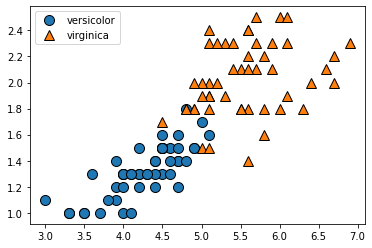

In [7]:
# SVMのソフトマージンについて
# 上記では全ての学習データを誤りなく線形分離可能であるという仮定を置いていた（ハードマージン）
# しかし,現実のデータではそのような仮定は成立しない
# この仮定を緩和するために、ソフトマージン(ペナルティ)による判別関数を求める

# irisデータを使用して実践
X = iris.data[50:, 2:]
Y = iris.target[50:] - 1

mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['versicolor', 'virginica'], loc='best')
plt.show() # 先ほどよりもデータの分離が悪い

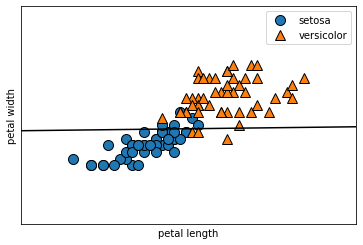

0.96


In [11]:
# 境界線をプロットする関数
def make_separate(model):
    mglearn.plots.plot_2d_separator(svm, X)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(['setosa', 'versicolor'], loc='best')
    plt.show()

# ソフトマージンパラメータC=0.1で描画
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC(C=0.1)
svm.fit(X_train, Y_train)
make_separate(svm)
print(svm.score(X_test, Y_test))

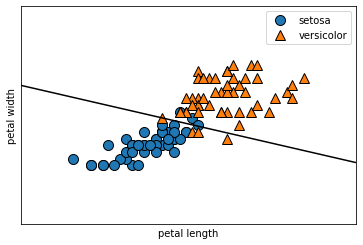

1.0


In [12]:
# ソフトマージンパラメータC=1.0で描画
svm = LinearSVC(C=1.0)
svm.fit(X_train, Y_train)
make_separate(svm)
print(svm.score(X_test, Y_test))

In [18]:
# 混同行列とROC解析

# 混同行列とは
# 主に分類問題で予測モデルの分類精度を示すときに利用される
# 以下の4パターンで分類する
# TP(True Positive)：正例を正しく正例と判別するケース
# FP(False Positive)：負例を誤って正例と判別するケース
# FN(False Negative)：負例を正しく負例と判別するケース
# TN(True Negative)：正例を誤って負例と判別するケース

from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(1, 4, 3, 2)

In [25]:
# TP, FP, FN, TNを用いて判別する様々な尺度が定義されている

# 正解率
# 全サンプルの中で正しく判別できたサンプルの割合
# (TP+TN)/(TP+FP+FN+TN)
from sklearn.metrics import accuracy_score
print("正解率 計算:{}, sklearn関数:{}".format((tp+tn)/(tp+fp+fn+tn), accuracy_score(y_true, y_pred)))

# 適合率
# 正例と分類されたサンプルのうち実際に正例であるサンプルの割合
# TP/(TP+FP)
from sklearn.metrics import precision_score
print("適合率 計算:{}, sklearn関数:{}".format(tp/(tp+fp), precision_score(y_true, y_pred)))

# 再現率(真陽性率、感度)
# 本来は正例と判別するべきサンプルのうち正しく正例と判別できたサンプルの割合
# TP/(TP+FN)
from sklearn.metrics import recall_score
print("再現率 計算:{}, sklearn関数:{}".format(tp/(tp+fn), recall_score(y_true, y_pred)))

# 真陰性率(特異度)
# 本来は負例と判別するべきサンプルのうち正しく負例と判別できたサンプルの割合
# TN/(TN+FP)
print("真陰性率:{}".format(tn/(tn+fp)))

# 偽陽性率
# 1-特異度で計算
print("偽陽性率:{}".format(1-tn/(tn+fp)))


正解率 計算:0.3, sklearn関数:0.3
適合率 計算:0.3333333333333333, sklearn関数:0.3333333333333333
再現率 計算:0.4, sklearn関数:0.4
真陰性率:0.2
偽陽性率:0.8


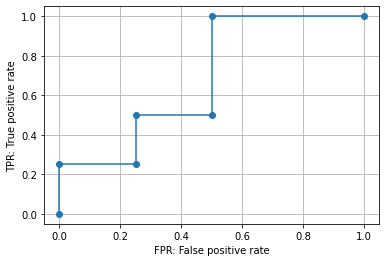

AUC:0.6875


In [28]:
# ROC曲線について
# 閾値の決め方によらずに全体的な判別器の性能を評価する方法
# 真陽性率と偽陽性率を二次元にプロットしたもの

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 1, 1, 1, 1]
y_score = [0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9]

fpr, tpr, thresholds = roc_curve(y_true, y_score)

# POC曲線を描画
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate') # 偽陽性率
plt.ylabel('TPR: True positive rate') # 真陽性率
plt.grid()
plt.show()

# その他、全体的な判別器の性能を評価する方法としてAUCが使われる
# ROC曲線の下側の面積で定義される
from sklearn.metrics import roc_auc_score
print("AUC:{}".format(roc_auc_score(y_true, y_score)))

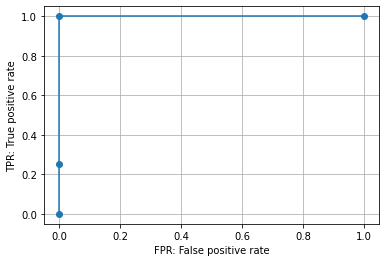

AUC:1.0


In [31]:
# 完全に正確に分類できる閾値が存在する場合

y_true_perfect = np.array([0, 0, 0, 0, 1, 1, 1, 1])
y_score_perfect = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

fpr, tpr, thresholds = roc_curve(y_true_perfect, y_score_perfect)

# POC曲線を描画
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate') # 偽陽性率
plt.ylabel('TPR: True positive rate') # 真陽性率
plt.grid()
plt.show()

print("AUC:{}".format(roc_auc_score(y_true_perfect, y_score_perfect)))